<a href="https://colab.research.google.com/github/bala1802/ERA/blob/main/Session-8/Session_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/ERA-Session-8

/content/drive/MyDrive/ERA-Session-8


# Import Libraries

In [3]:
import torch
from torchsummary import summary
import torchvision
import random
import matplotlib.pyplot as plt
import warnings

# Import Helper Scripts

In [4]:
import util as util
import model as model

CUDA Available? True


# Data Utils

In [5]:
class_names = util.load_class_names()

In [6]:
train_data = util.load_train_data()
test_data = util.load_test_data()
len(train_data), len(test_data)

Files already downloaded and verified
Files already downloaded and verified


(50000, 10000)

In [7]:
train_loader = util.loadTrainLoader(train=train_data)
test_loader = util.loadTestLoader(test=test_data)
len(train_loader), len(test_loader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


(391, 79)

## Exploratory Data Analysis

### Train and Test data analysis

In [ ]:
util.explainData(train_data=train_data, test_data=test_data, train_loader=train_loader, test_loader=test_loader)

Train Data Length :  50000
Shape of Each image present in the train_data: torch.Size([3, 32, 32])
Test Data Length :  10000
Shape of Each image present in the test_data: torch.Size([3, 32, 32])


### Visualize the Random images along with their labels

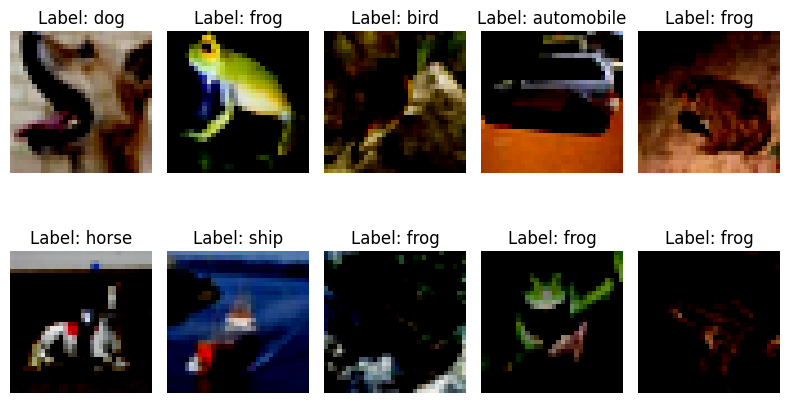

In [ ]:
util.visualize_random_images(train_loader=train_loader)

# Cuda selection

In [10]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


# Model Building

## Model-1

- Used Group Normalization
- The number of parameters used are `46,024`

In [ ]:
model_1 = model.Model_1().to(device)
summary(model_1, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
         GroupNorm-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           9,216
         GroupNorm-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 10, 32, 32]             320
         GroupNorm-8           [-1, 10, 32, 32]              20
              ReLU-9           [-1, 10, 32, 32]               0
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           2,880
        GroupNorm-12           [-1, 32, 16, 16]              64
             ReLU-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 32,

In [ ]:
optimizer = util.load_optimizer(model=model_1)
train_acc, train_losses, test_acc, test_losses, _, _ = util.run_epochs(model=model_1, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=20)

EPOCH: 0


Loss=1.4442278146743774 Batch_id=390 Accuracy=32.07: 100%|██████████| 391/391 [00:19<00:00, 20.23it/s]



Test set: Average loss: 1.4978, Accuracy: 4573/10000 (45.73%)

EPOCH: 1


Loss=1.1262820959091187 Batch_id=390 Accuracy=48.32: 100%|██████████| 391/391 [00:18<00:00, 21.58it/s]



Test set: Average loss: 1.2335, Accuracy: 5555/10000 (55.55%)

EPOCH: 2


Loss=1.0370755195617676 Batch_id=390 Accuracy=56.47: 100%|██████████| 391/391 [00:19<00:00, 20.14it/s]



Test set: Average loss: 1.2034, Accuracy: 5770/10000 (57.70%)

EPOCH: 3


Loss=1.092111349105835 Batch_id=390 Accuracy=61.56: 100%|██████████| 391/391 [00:18<00:00, 21.35it/s]



Test set: Average loss: 1.0868, Accuracy: 6156/10000 (61.56%)

EPOCH: 4


Loss=1.0550777912139893 Batch_id=390 Accuracy=64.79: 100%|██████████| 391/391 [00:19<00:00, 19.87it/s]



Test set: Average loss: 0.9782, Accuracy: 6580/10000 (65.80%)

EPOCH: 5


Loss=0.9453734159469604 Batch_id=390 Accuracy=67.64: 100%|██████████| 391/391 [00:18<00:00, 21.46it/s]



Test set: Average loss: 0.9908, Accuracy: 6522/10000 (65.22%)

EPOCH: 6


Loss=0.7963884472846985 Batch_id=390 Accuracy=69.73: 100%|██████████| 391/391 [00:19<00:00, 20.24it/s]



Test set: Average loss: 0.9166, Accuracy: 6838/10000 (68.38%)

EPOCH: 7


Loss=0.7950700521469116 Batch_id=390 Accuracy=71.65: 100%|██████████| 391/391 [00:18<00:00, 21.36it/s]



Test set: Average loss: 0.8417, Accuracy: 7090/10000 (70.90%)

EPOCH: 8


Loss=0.7091858983039856 Batch_id=390 Accuracy=73.02: 100%|██████████| 391/391 [00:18<00:00, 20.97it/s]



Test set: Average loss: 0.8285, Accuracy: 7111/10000 (71.11%)

EPOCH: 9


Loss=0.569036602973938 Batch_id=390 Accuracy=74.36: 100%|██████████| 391/391 [00:17<00:00, 22.08it/s]



Test set: Average loss: 0.8088, Accuracy: 7251/10000 (72.51%)

EPOCH: 10


Loss=0.5726427435874939 Batch_id=390 Accuracy=75.05: 100%|██████████| 391/391 [00:18<00:00, 21.55it/s]



Test set: Average loss: 0.7826, Accuracy: 7309/10000 (73.09%)

EPOCH: 11


Loss=0.6027888655662537 Batch_id=390 Accuracy=76.28: 100%|██████████| 391/391 [00:18<00:00, 21.38it/s]



Test set: Average loss: 0.7499, Accuracy: 7427/10000 (74.27%)

EPOCH: 12


Loss=0.6960693597793579 Batch_id=390 Accuracy=77.01: 100%|██████████| 391/391 [00:17<00:00, 21.78it/s]



Test set: Average loss: 0.7575, Accuracy: 7382/10000 (73.82%)

EPOCH: 13


Loss=0.856391429901123 Batch_id=390 Accuracy=77.97: 100%|██████████| 391/391 [00:18<00:00, 20.98it/s]



Test set: Average loss: 0.7402, Accuracy: 7457/10000 (74.57%)

EPOCH: 14


Loss=0.43266111612319946 Batch_id=390 Accuracy=78.50: 100%|██████████| 391/391 [00:18<00:00, 20.67it/s]



Test set: Average loss: 0.7477, Accuracy: 7415/10000 (74.15%)

EPOCH: 15


Loss=0.6991991400718689 Batch_id=390 Accuracy=79.34: 100%|██████████| 391/391 [00:19<00:00, 20.09it/s]



Test set: Average loss: 0.7442, Accuracy: 7458/10000 (74.58%)

EPOCH: 16


Loss=0.5969148874282837 Batch_id=390 Accuracy=79.68: 100%|██████████| 391/391 [00:18<00:00, 21.42it/s]



Test set: Average loss: 0.7767, Accuracy: 7384/10000 (73.84%)

EPOCH: 17


Loss=0.7809539437294006 Batch_id=390 Accuracy=80.03: 100%|██████████| 391/391 [00:19<00:00, 20.33it/s]



Test set: Average loss: 0.7554, Accuracy: 7499/10000 (74.99%)

EPOCH: 18


Loss=0.44563522934913635 Batch_id=390 Accuracy=80.70: 100%|██████████| 391/391 [00:18<00:00, 21.10it/s]



Test set: Average loss: 0.7193, Accuracy: 7519/10000 (75.19%)

EPOCH: 19


Loss=0.40737709403038025 Batch_id=390 Accuracy=81.20: 100%|██████████| 391/391 [00:19<00:00, 19.90it/s]



Test set: Average loss: 0.7283, Accuracy: 7552/10000 (75.52%)



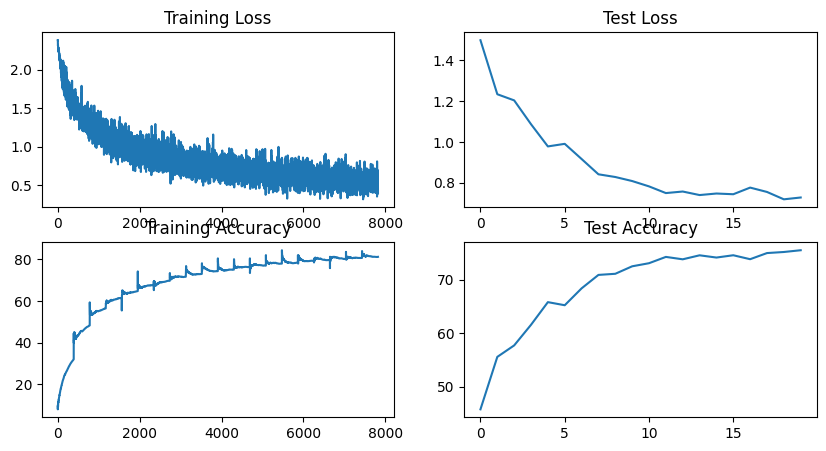

In [ ]:
util.plot_results(train_acc=train_acc, train_losses=train_losses, test_acc=test_acc, test_losses=test_losses)

## Model-2
- Used Layer Normalization
- The number of paramters used are `46,024`

In [ ]:
model_2 = model.Model_2().to(device)
summary(model_2, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
         GroupNorm-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           9,216
         GroupNorm-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 10, 32, 32]             320
         GroupNorm-8           [-1, 10, 32, 32]              20
              ReLU-9           [-1, 10, 32, 32]               0
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           2,880
        GroupNorm-12           [-1, 32, 16, 16]              64
             ReLU-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 32,

In [ ]:
optimizer = util.load_optimizer(model=model_2)
train_acc, train_losses, test_acc, test_losses, _, _ = util.run_epochs(model=model_2, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=20)

EPOCH: 0


Loss=1.54220449924469 Batch_id=390 Accuracy=28.23: 100%|██████████| 391/391 [00:18<00:00, 21.15it/s]



Test set: Average loss: 1.6101, Accuracy: 4071/10000 (40.71%)

EPOCH: 1


Loss=1.0588457584381104 Batch_id=390 Accuracy=43.64: 100%|██████████| 391/391 [00:18<00:00, 21.13it/s]



Test set: Average loss: 1.3899, Accuracy: 4902/10000 (49.02%)

EPOCH: 2


Loss=1.1048214435577393 Batch_id=390 Accuracy=51.76: 100%|██████████| 391/391 [00:19<00:00, 20.15it/s]



Test set: Average loss: 1.2121, Accuracy: 5587/10000 (55.87%)

EPOCH: 3


Loss=1.115968942642212 Batch_id=390 Accuracy=57.72: 100%|██████████| 391/391 [00:18<00:00, 21.05it/s]



Test set: Average loss: 1.1414, Accuracy: 5954/10000 (59.54%)

EPOCH: 4


Loss=0.9926430583000183 Batch_id=390 Accuracy=61.34: 100%|██████████| 391/391 [00:18<00:00, 21.01it/s]



Test set: Average loss: 1.0834, Accuracy: 6155/10000 (61.55%)

EPOCH: 5


Loss=1.0022437572479248 Batch_id=390 Accuracy=64.10: 100%|██████████| 391/391 [00:18<00:00, 20.66it/s]



Test set: Average loss: 1.0903, Accuracy: 6137/10000 (61.37%)

EPOCH: 6


Loss=0.8575531244277954 Batch_id=390 Accuracy=66.73: 100%|██████████| 391/391 [00:18<00:00, 20.77it/s]



Test set: Average loss: 0.9117, Accuracy: 6806/10000 (68.06%)

EPOCH: 7


Loss=0.898360550403595 Batch_id=390 Accuracy=69.30: 100%|██████████| 391/391 [00:19<00:00, 20.17it/s]



Test set: Average loss: 0.8798, Accuracy: 6914/10000 (69.14%)

EPOCH: 8


Loss=0.8216525316238403 Batch_id=390 Accuracy=70.61: 100%|██████████| 391/391 [00:18<00:00, 20.73it/s]



Test set: Average loss: 0.8717, Accuracy: 6937/10000 (69.37%)

EPOCH: 9


Loss=0.5902955532073975 Batch_id=390 Accuracy=71.98: 100%|██████████| 391/391 [00:20<00:00, 19.55it/s]



Test set: Average loss: 0.8326, Accuracy: 7121/10000 (71.21%)

EPOCH: 10


Loss=0.5618451833724976 Batch_id=390 Accuracy=73.66: 100%|██████████| 391/391 [00:18<00:00, 21.02it/s]



Test set: Average loss: 0.8115, Accuracy: 7164/10000 (71.64%)

EPOCH: 11


Loss=0.5784012079238892 Batch_id=390 Accuracy=74.68: 100%|██████████| 391/391 [00:19<00:00, 19.74it/s]



Test set: Average loss: 0.7955, Accuracy: 7257/10000 (72.57%)

EPOCH: 12


Loss=0.6372607946395874 Batch_id=390 Accuracy=75.61: 100%|██████████| 391/391 [00:18<00:00, 20.84it/s]



Test set: Average loss: 0.8344, Accuracy: 7134/10000 (71.34%)

EPOCH: 13


Loss=1.0261399745941162 Batch_id=390 Accuracy=76.44: 100%|██████████| 391/391 [00:19<00:00, 19.66it/s]



Test set: Average loss: 0.7526, Accuracy: 7372/10000 (73.72%)

EPOCH: 14


Loss=0.8036123514175415 Batch_id=390 Accuracy=76.69: 100%|██████████| 391/391 [00:18<00:00, 21.10it/s]



Test set: Average loss: 0.7570, Accuracy: 7317/10000 (73.17%)

EPOCH: 15


Loss=0.6498600244522095 Batch_id=390 Accuracy=77.62: 100%|██████████| 391/391 [00:20<00:00, 19.33it/s]



Test set: Average loss: 0.7115, Accuracy: 7567/10000 (75.67%)

EPOCH: 16


Loss=0.6501033306121826 Batch_id=390 Accuracy=78.81: 100%|██████████| 391/391 [00:18<00:00, 20.58it/s]



Test set: Average loss: 0.7191, Accuracy: 7528/10000 (75.28%)

EPOCH: 17


Loss=0.8718591928482056 Batch_id=390 Accuracy=79.18: 100%|██████████| 391/391 [00:20<00:00, 19.04it/s]



Test set: Average loss: 0.7581, Accuracy: 7391/10000 (73.91%)

EPOCH: 18


Loss=0.6897112131118774 Batch_id=390 Accuracy=79.73: 100%|██████████| 391/391 [00:18<00:00, 20.91it/s]



Test set: Average loss: 0.7312, Accuracy: 7504/10000 (75.04%)

EPOCH: 19


Loss=0.4644211232662201 Batch_id=390 Accuracy=80.02: 100%|██████████| 391/391 [00:20<00:00, 19.20it/s]



Test set: Average loss: 0.6893, Accuracy: 7602/10000 (76.02%)



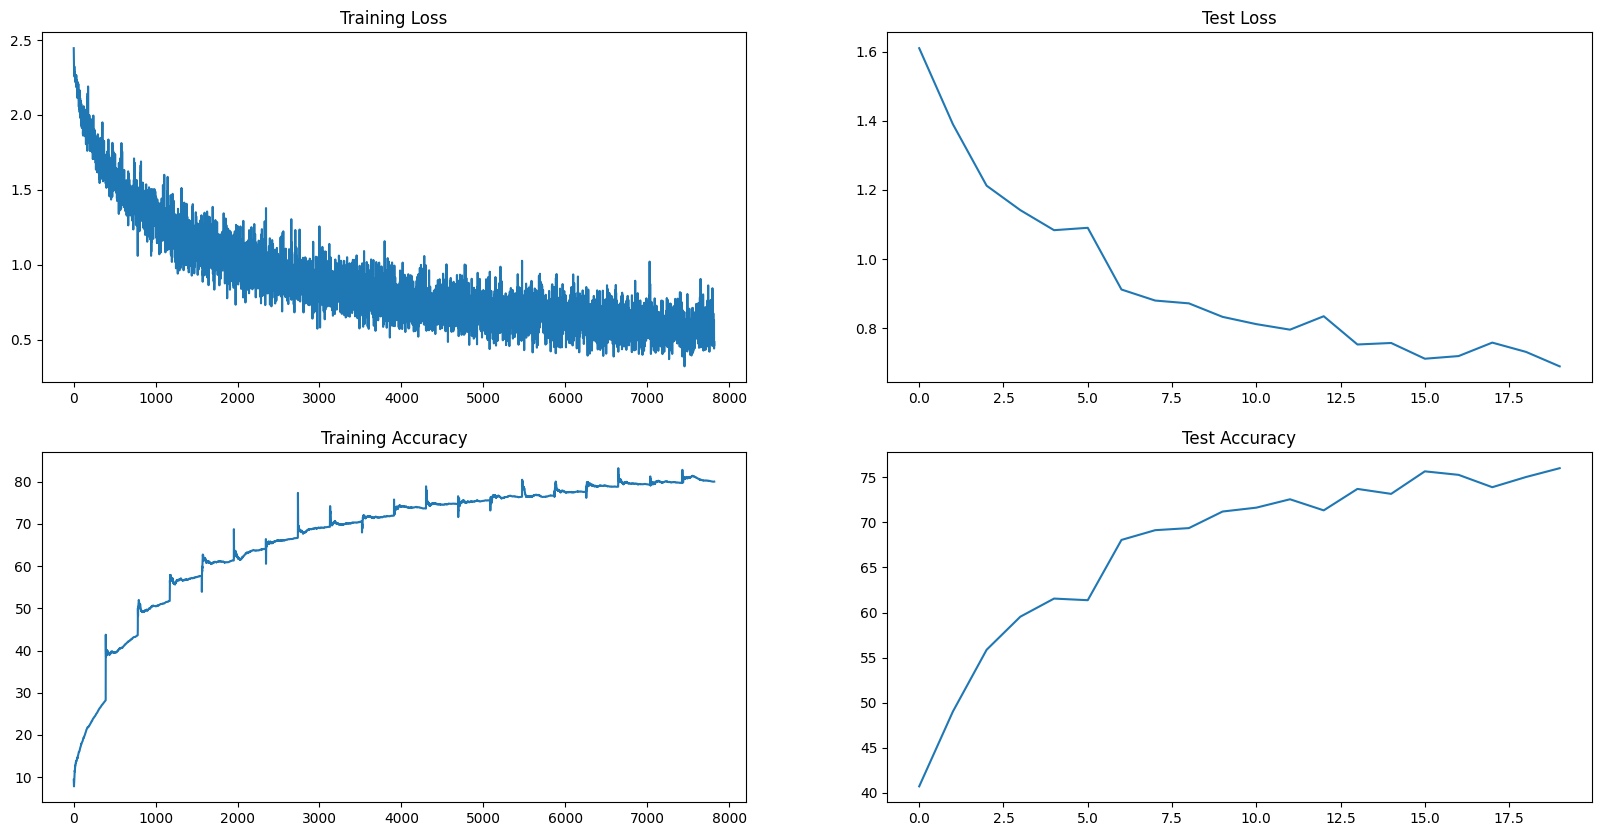

In [ ]:
util.plot_results(train_acc=train_acc, train_losses=train_losses, test_acc=test_acc, test_losses=test_losses)

## Model-3

- Used Batch Normalization
- The number of parameters used are `46,024`

In [11]:
model_3 = model.Model_3().to(device)
summary(model_3, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           9,216
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 10, 32, 32]             320
       BatchNorm2d-8           [-1, 10, 32, 32]              20
              ReLU-9           [-1, 10, 32, 32]               0
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           2,880
      BatchNorm2d-12           [-1, 32, 16, 16]              64
             ReLU-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 32,

In [20]:
optimizer = util.load_optimizer(model=model_3)
train_acc, train_losses, test_acc, test_losses, misclassified_images_for_all_epochs, misclassified_labels_for_all_epochs = util.run_epochs(model=model_3, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=5)

EPOCH: 0


Loss=0.2600485682487488 Batch_id=390 Accuracy=91.20: 100%|██████████| 391/391 [00:18<00:00, 20.77it/s]



Test set: Average loss: 0.8574, Accuracy: 7607/10000 (76.07%)

EPOCH: 1


Loss=0.22738739848136902 Batch_id=390 Accuracy=91.31: 100%|██████████| 391/391 [00:20<00:00, 19.51it/s]



Test set: Average loss: 0.7913, Accuracy: 7768/10000 (77.68%)

EPOCH: 2


Loss=0.22988450527191162 Batch_id=390 Accuracy=91.61: 100%|██████████| 391/391 [00:18<00:00, 20.96it/s]



Test set: Average loss: 0.7910, Accuracy: 7797/10000 (77.97%)

EPOCH: 3


Loss=0.31942012906074524 Batch_id=390 Accuracy=91.63: 100%|██████████| 391/391 [00:20<00:00, 19.47it/s]



Test set: Average loss: 0.9042, Accuracy: 7647/10000 (76.47%)

EPOCH: 4


Loss=0.29516249895095825 Batch_id=390 Accuracy=91.78: 100%|██████████| 391/391 [00:18<00:00, 20.70it/s]



Test set: Average loss: 0.8065, Accuracy: 7774/10000 (77.74%)



In [21]:
len(misclassified_images_for_all_epochs), len(misclassified_labels_for_all_epochs)

(11407, 11407)

In [22]:
misclassified_images_for_all_epochs = misclassified_images_for_all_epochs[:10]
misclassified_labels_for_all_epochs = misclassified_labels_for_all_epochs[:10]

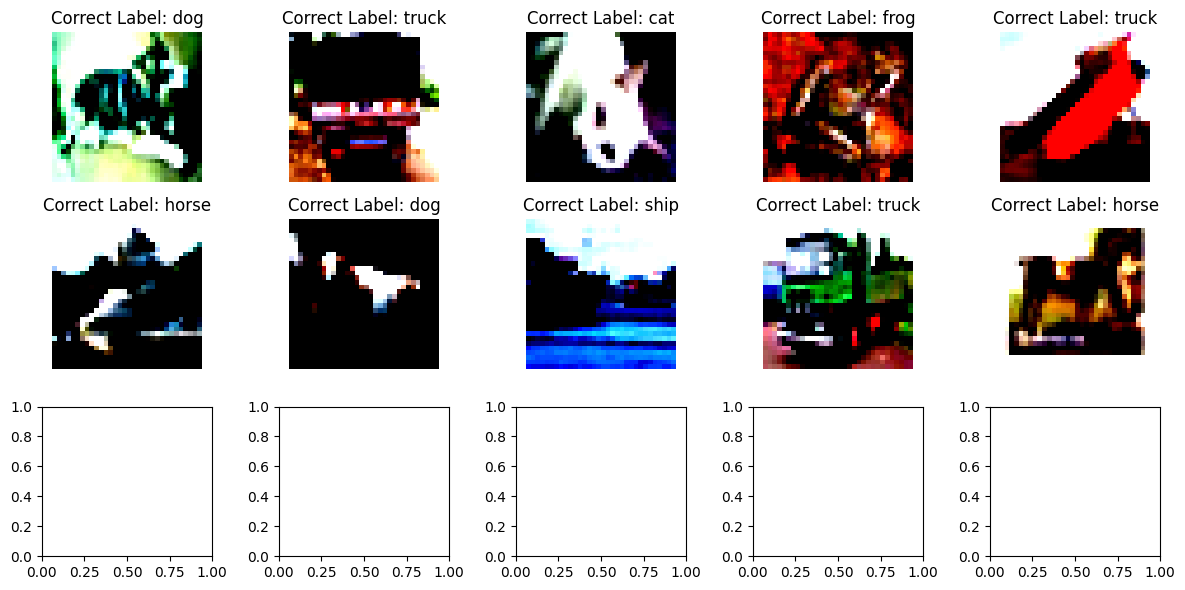

In [23]:
util.display_misclassified_images(images=misclassified_images_for_all_epochs, labels=misclassified_labels_for_all_epochs)

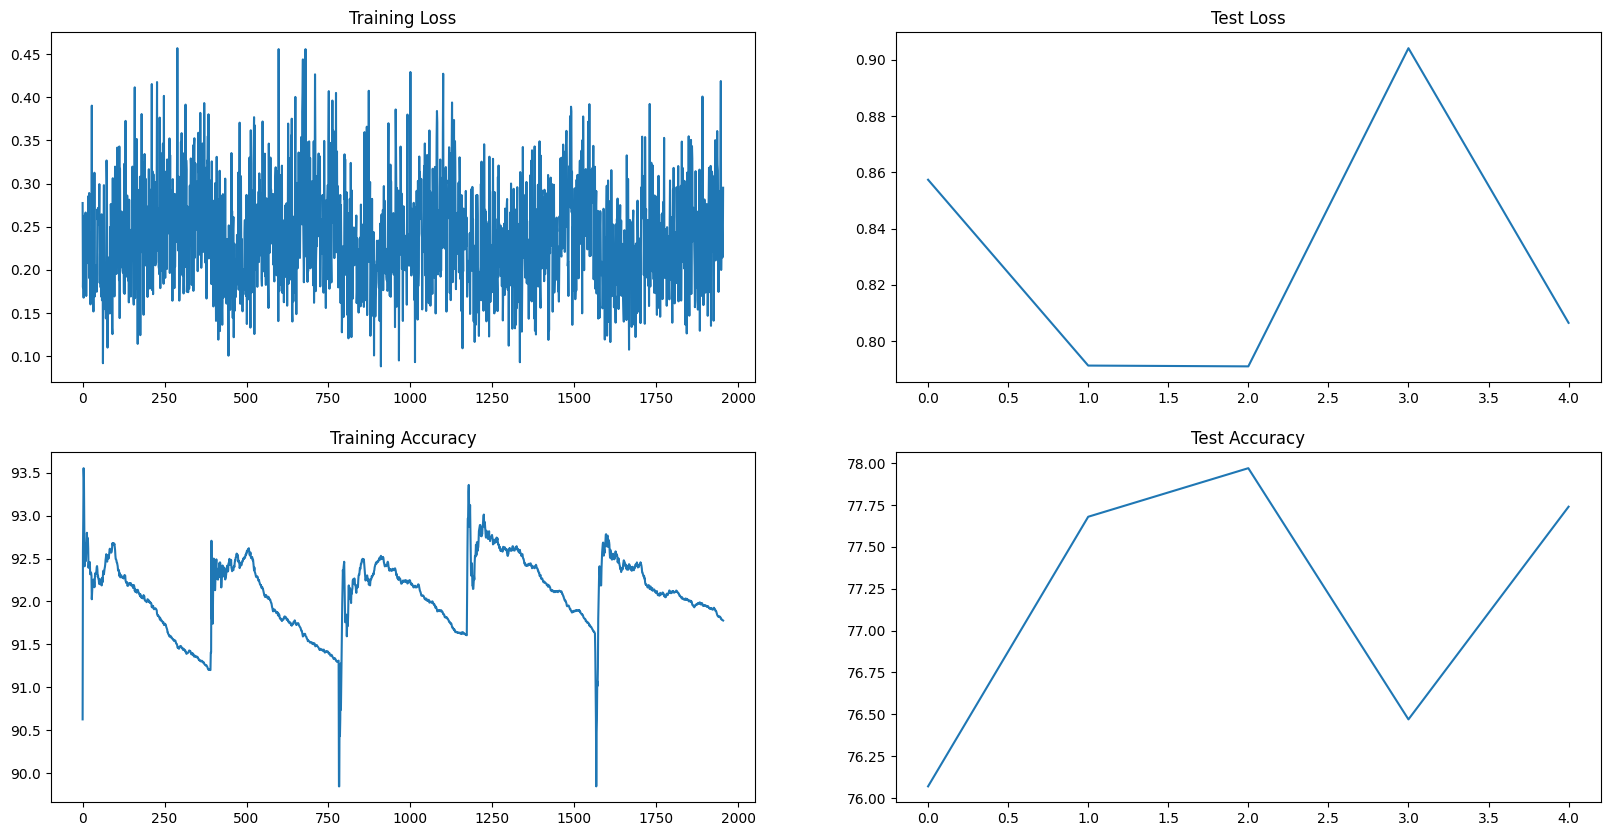

In [24]:
util.plot_results(train_acc=train_acc, train_losses=train_losses, test_acc=test_acc, test_losses=test_losses)